In [32]:
%matplotlib inline
from modsim import *

In [33]:
def make_system(k, length):
    g= 9.8
    mass = 26
    return System(g=g, mass=mass, length=length, k=k)

In [34]:
k=6567
length=0.15
system = make_system(k, length)
system

,value
g,9.80
mass,26.00
length,0.15
k,6567.00


In [55]:
def find_distance(k, length):
    time =0.1
    f_s = length * k
    a_s = f_s / system.mass
    v_s = a_s*time
    d=v_s**2/(2*g)
    return d

In [56]:
def sweep_k(k_array, length):
    sweep = SweepSeries()
    for k in k_array:
        system=make_system(k, length)
        sweep[system.k] = find_distance(k,length)
    return sweep

In [57]:
def sweep_parameters(k_array, length_array):
    frame=SweepFrame(columns = length_array)
    for length in length_array:
        frame[length] = sweep_k(k_arraym

In [121]:
k_array = linspace(3000,7000, 21)
length_array = linspace(.05,.25,21)

In [122]:
frame =sweep_parameters(k_array, length_array)

In [123]:
frame.shape

(21, 21)

Saving figure to file ColorMap.pdf


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


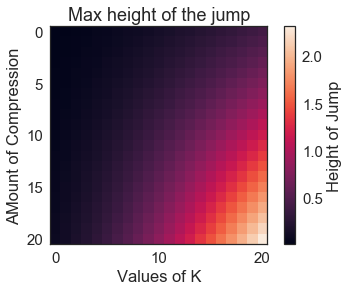

In [125]:
array_2d=frame.as_matrix()

newfig()
plt.imshow(array_2d)

cbar=plt.colorbar()
cbar.set_label("Height of Jump")
decorate(xlabel='Values of K',
         ylabel='AMount of Compression',
         title = 'Max height of the jump')
savefig('ColorMap.pdf')